In [11]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

pd.set_option('display.float_format', lambda x: '%.2f' % x)

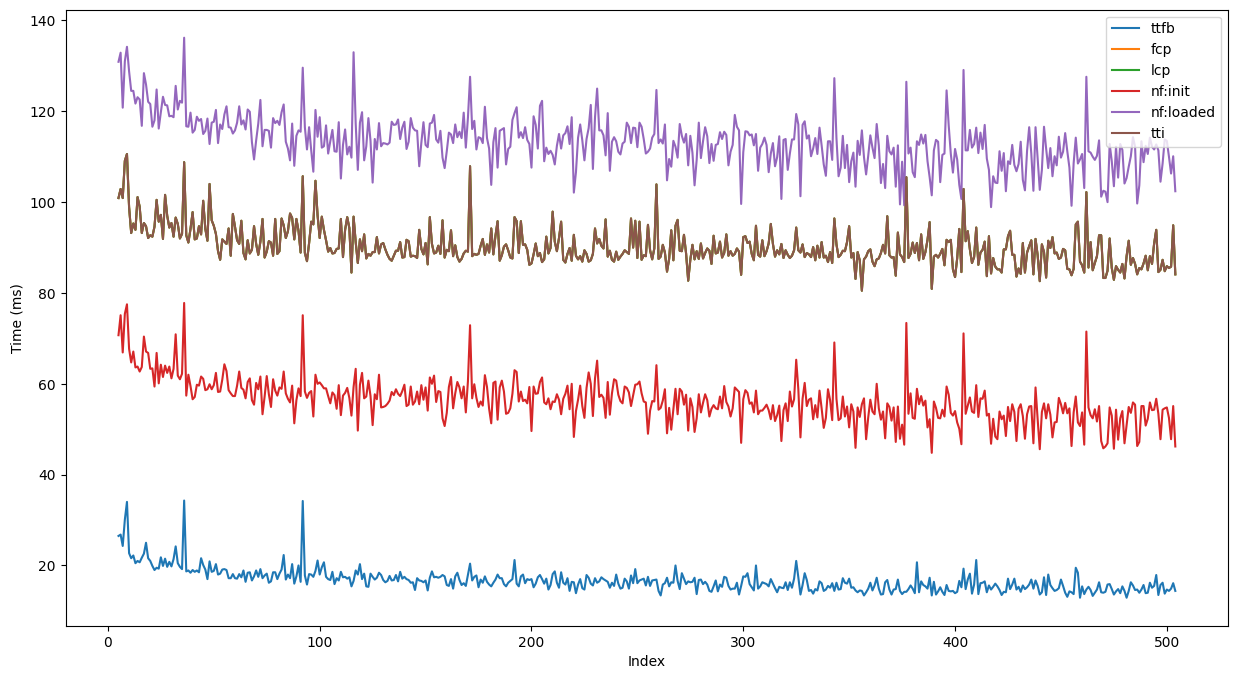

In [12]:
df = pd.read_csv('../../../../data/core-web-vitals/testrun-8/results-ssrh.csv', sep=',')

features = ['navTime', 'totalTime', 'lcp', 'fcp', 'ttfb', 'tbt', 'tti', 'longestTask', 'longTasks', 'nf:init', 'nf:config','nf:loaded']
target_features = ['ttfb', 'fcp', 'lcp',  'nf:init', 'nf:loaded', 'tti'] #

# Remove Java warmup
df = df.iloc[5:]

# Plotting the line graph for ttfb, fcp, and tti
plt.figure(figsize=(15, 8))
for t in target_features:
    plt.plot(df[t], label=t)

plt.xlabel('Index')
plt.ylabel('Time (ms)')
plt.legend()
plt.show()

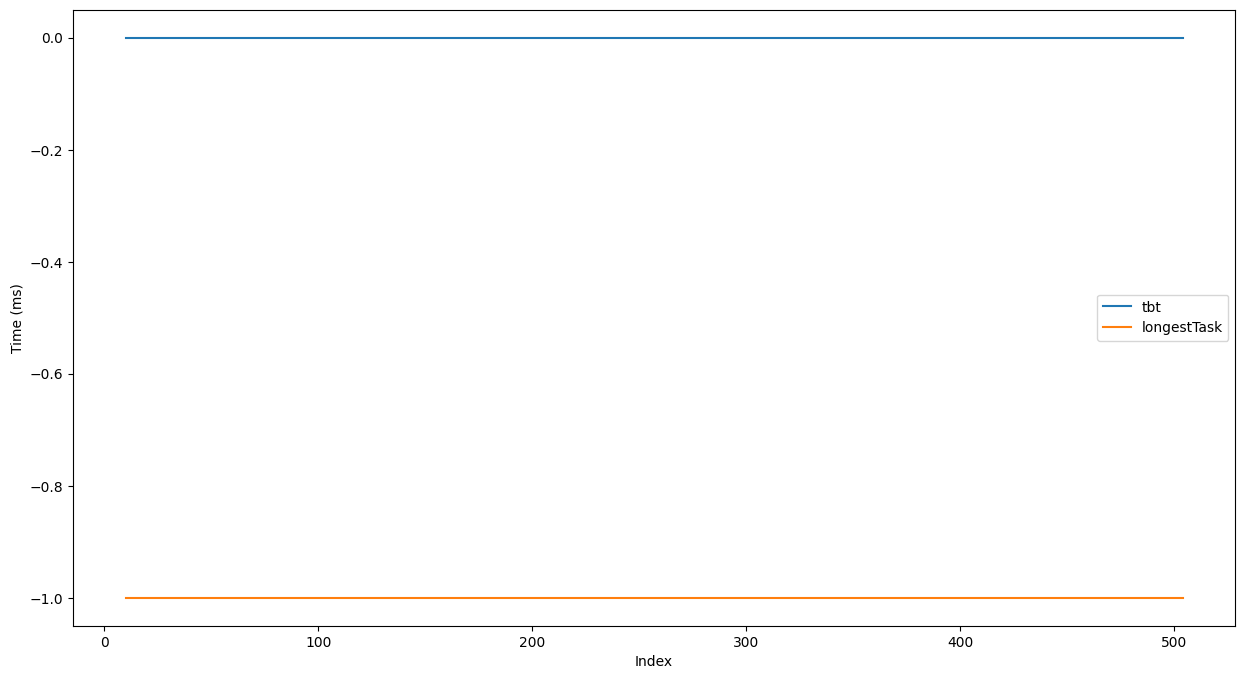

In [13]:

target_features = ['tbt', 'longestTask'] #

# Remove Java warmup
df = df.iloc[5:]

# Plotting the line graph for ttfb, fcp, and tti
plt.figure(figsize=(15, 8))
for t in target_features:
    plt.plot(df[t], label=t)

plt.xlabel('Index')
plt.ylabel('Time (ms)')
plt.legend()
plt.show()

In [14]:
features = ['navTime', 'totalTime', 'lcp', 'fcp', 'ttfb', 'tbt', 'tti', 'longestTask', 'longTasks', 'nf:init', 'nf:config','nf:loaded']
headers = ["feature","Tests", "min", "1st Qrt.", "mean", "median", "3rd Qrt.", "max", "std dev."] 
report = []

for f in features:
  report.append([
      f,
      df[f].size,
      df[f].min(),
      df[f].quantile(0.25),
      df[f].mean(),
      df[f].median(),
      df[f].quantile(0.75),
      df[f].max(),
      df[f].std(),
  ])

pd.DataFrame(report, columns=headers)

,feature,Tests,min,1st Qrt.,mean,median,3rd Qrt.,max,std dev.
0,navTime,495,18.00,20.00,21.76,21.00,23.00,40.00,2.76
1,totalTime,495,83.00,108.00,111.94,112.00,116.00,136.00,7.41
2,lcp,495,80.50,87.80,90.13,89.20,92.00,108.80,4.03
3,fcp,495,80.50,87.80,90.13,89.20,92.00,108.80,4.03
4,ttfb,495,12.90,15.00,16.60,16.30,17.50,34.30,2.29
5,tbt,495,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,tti,495,80.50,87.80,90.13,89.20,92.00,108.80,4.03
7,longestTask,495,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00
8,longTasks,495,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,nf:init,495,44.80,53.60,56.27,56.10,58.90,77.80,4.69
